In [1]:
import missingno as msno
from pandas_profiling import ProfileReport
import functions as fct
import warnings
import cufflinks as cf
import plotly.offline as offline
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
py.init_notebook_mode(connected=True)
init_notebook_mode(connected=True)
offline.init_notebook_mode()
cf.go_offline()
warnings.simplefilter(action='ignore', category=FutureWarning)



ModuleNotFoundError: No module named 'pandas_profiling'

   # Chargement des données

In [ ]:
application_train = pd.read_csv('../01_DATA/application_train.csv')
POS_CASH_balance = pd.read_csv('../01_DATA/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('../01_DATA/bureau_balance.csv')
previous_application = pd.read_csv('../01_DATA/previous_application.csv')
installments_payments = pd.read_csv('../01_DATA/installments_payments.csv')
credit_card_balance = pd.read_csv('../01_DATA/credit_card_balance.csv')
bureau = pd.read_csv('../01_DATA/bureau.csv')
application_test = pd.read_csv('../01_DATA/application_test.csv')



In [ ]:
print('Size of application_train data', application_train.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)



Size of application_train data (307511, 122)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)
Size of bureau data (1716428, 17)


In [7]:
# profile = ProfileReport(application_train)
# profile.to_file(output_file='rapport_application_train.html')



   # Aperçu des données disponibles

In [ ]:
application_train.info(verbose=1, show_counts=1)



NameError: name 'application_train' is not defined

In [ ]:
POS_CASH_balance.info(verbose=1, show_counts=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   SK_ID_PREV             10001358 non-null  int64  
 1   SK_ID_CURR             10001358 non-null  int64  
 2   MONTHS_BALANCE         10001358 non-null  int64  
 3   CNT_INSTALMENT         9975287 non-null   float64
 4   CNT_INSTALMENT_FUTURE  9975271 non-null   float64
 5   NAME_CONTRACT_STATUS   10001358 non-null  object 
 6   SK_DPD                 10001358 non-null  int64  
 7   SK_DPD_DEF             10001358 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [ ]:
bureau_balance.info(verbose=1, show_counts=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   SK_ID_BUREAU    27299925 non-null  int64 
 1   MONTHS_BALANCE  27299925 non-null  int64 
 2   STATUS          27299925 non-null  object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [2]:
previous_application.info(verbose=1, show_counts=1)



NameError: name 'previous_application' is not defined

In [12]:
installments_payments.info(verbose=1, show_counts=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Non-Null Count     Dtype  
---  ------                  --------------     -----  
 0   SK_ID_PREV              13605401 non-null  int64  
 1   SK_ID_CURR              13605401 non-null  int64  
 2   NUM_INSTALMENT_VERSION  13605401 non-null  float64
 3   NUM_INSTALMENT_NUMBER   13605401 non-null  int64  
 4   DAYS_INSTALMENT         13605401 non-null  float64
 5   DAYS_ENTRY_PAYMENT      13602496 non-null  float64
 6   AMT_INSTALMENT          13605401 non-null  float64
 7   AMT_PAYMENT             13602496 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [13]:
credit_card_balance.info(verbose=1, show_counts=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  3840312 non-null  int64  
 1   SK_ID_CURR                  3840312 non-null  int64  
 2   MONTHS_BALANCE              3840312 non-null  int64  
 3   AMT_BALANCE                 3840312 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL     3840312 non-null  int64  
 5   AMT_DRAWINGS_ATM_CURRENT    3090496 non-null  float64
 6   AMT_DRAWINGS_CURRENT        3840312 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT  3090496 non-null  float64
 8   AMT_DRAWINGS_POS_CURRENT    3090496 non-null  float64
 9   AMT_INST_MIN_REGULARITY     3535076 non-null  float64
 10  AMT_PAYMENT_CURRENT         3072324 non-null  float64
 11  AMT_PAYMENT_TOTAL_CURRENT   3840312 non-null  float64
 12  AMT_RECEIVABLE_PRINCIPAL    3840312 non-null  float64
 1

In [14]:
bureau.info(verbose=1, show_counts=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SUM          1716415 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     1458759 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    1124648 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  1716428 non-null  float64
 14  CR

   # Target

In [15]:
application_train['TARGET'].value_counts(dropna=False)



0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

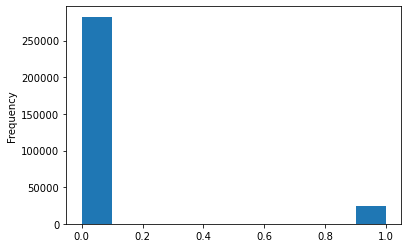

In [16]:
application_train.TARGET.plot.hist()



In [17]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels',
         values='values', title='Loan Repayed or not')



   Les classes cibles sont déséquilibrées : 92% des prêts sont remboursés.

   # Valeurs manquantes

In [18]:
# Function to calculate missing values by column# Funct


def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns



   Application_train

Il y a 75.85% valeurs renseignées (soit 24.15 % de valeurs manquantes) dans l'intégralité du df
Your selected dataframe has 124 columns.
There are 68 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


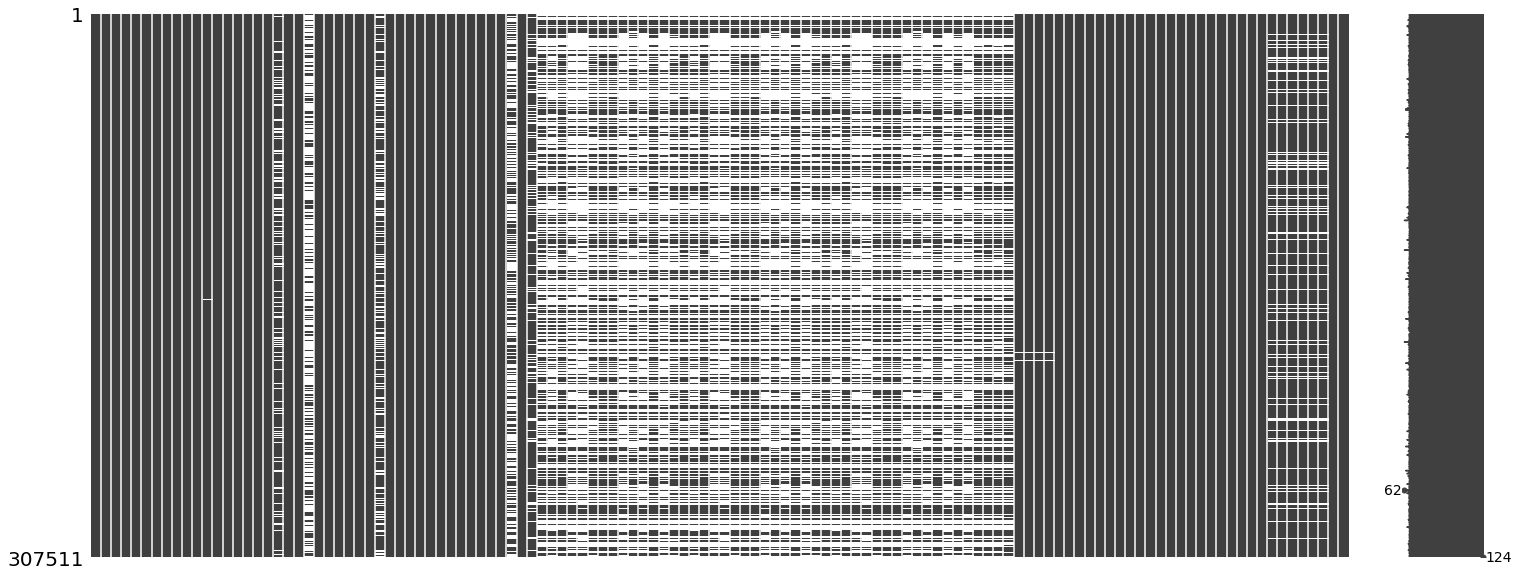

In [86]:
fct.pourcent_NA_df(application_train)
msno.matrix(application_train)
# Missing values statistics
missing_values = missing_values_table(application_train)
missing_values.head(20)



   POS_CASH_balance

Il y a 99.93% valeurs renseignées (soit 0.07 % de valeurs manquantes) dans l'intégralité du df
Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CNT_INSTALMENT_FUTURE,26087,0.3
CNT_INSTALMENT,26071,0.3


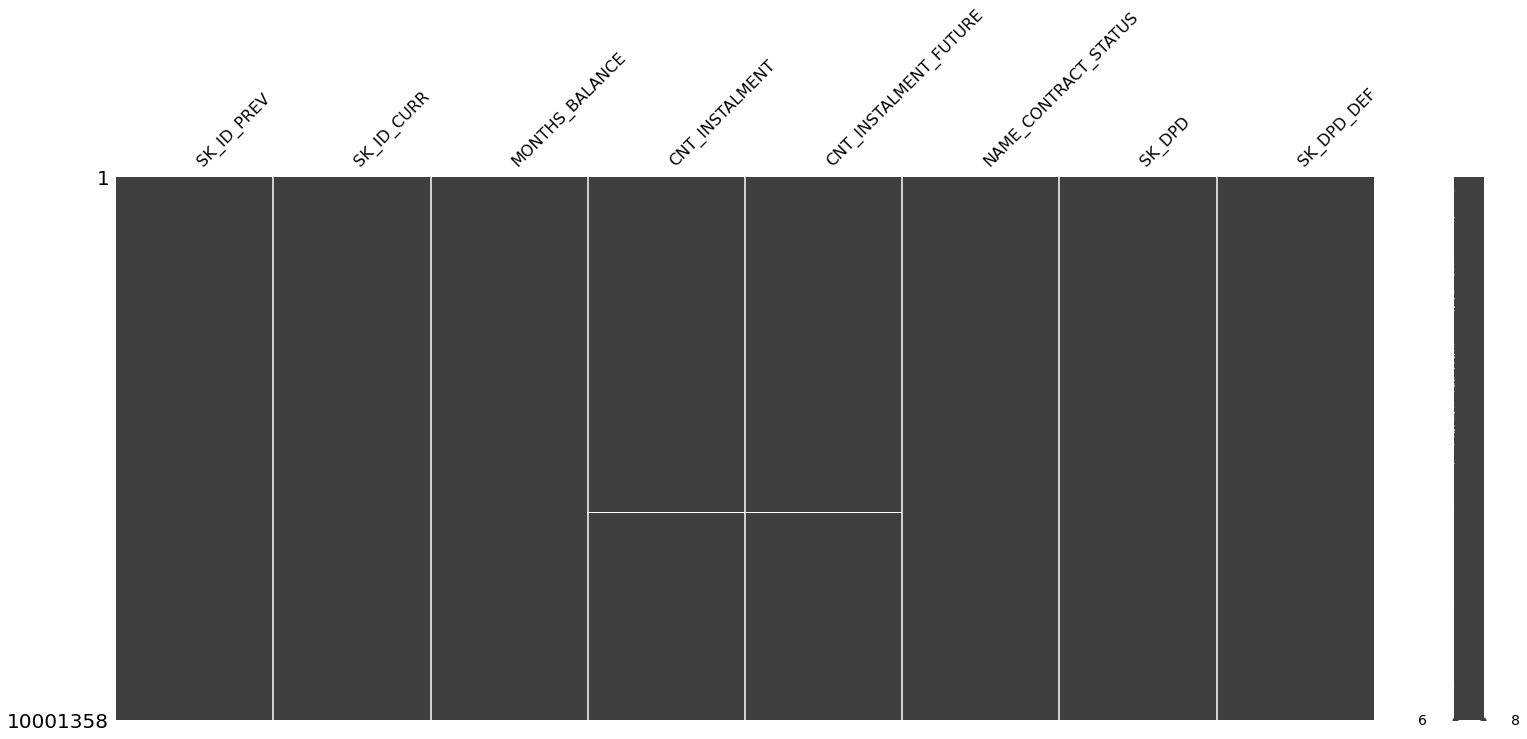

In [20]:
fct.pourcent_NA_df(POS_CASH_balance)
msno.matrix(POS_CASH_balance)
# Missing values statistics
missing_values = missing_values_table(POS_CASH_balance)
missing_values.head(20)



   Bureau_balance

Il y a 100.00% valeurs renseignées (soit 0.00 % de valeurs manquantes) dans l'intégralité du df
Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


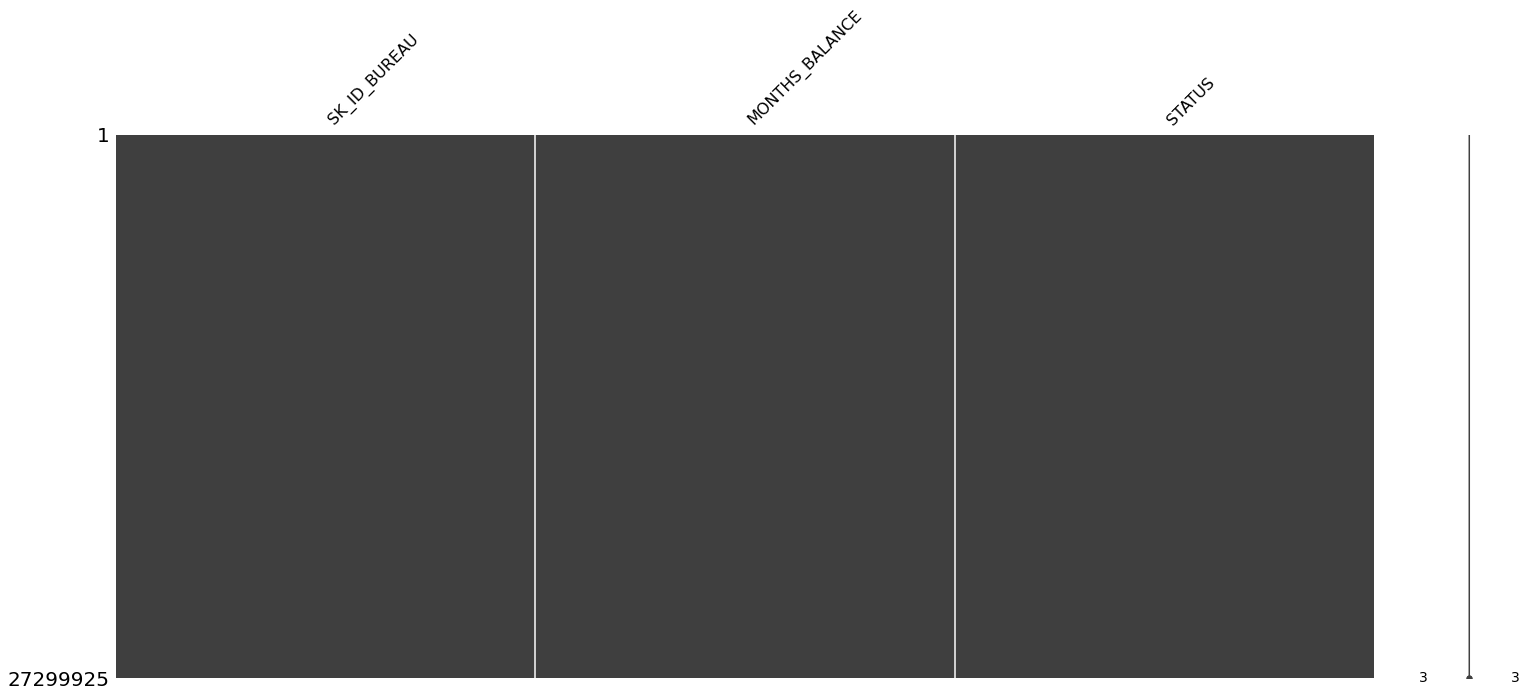

In [21]:
fct.pourcent_NA_df(bureau_balance)
msno.matrix(bureau_balance)
# Missing values statistics
missing_values = missing_values_table(bureau_balance)
missing_values.head(20)



   Previous_application

Il y a 82.02% valeurs renseignées (soit 17.98 % de valeurs manquantes) dans l'intégralité du df
Your selected dataframe has 37 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


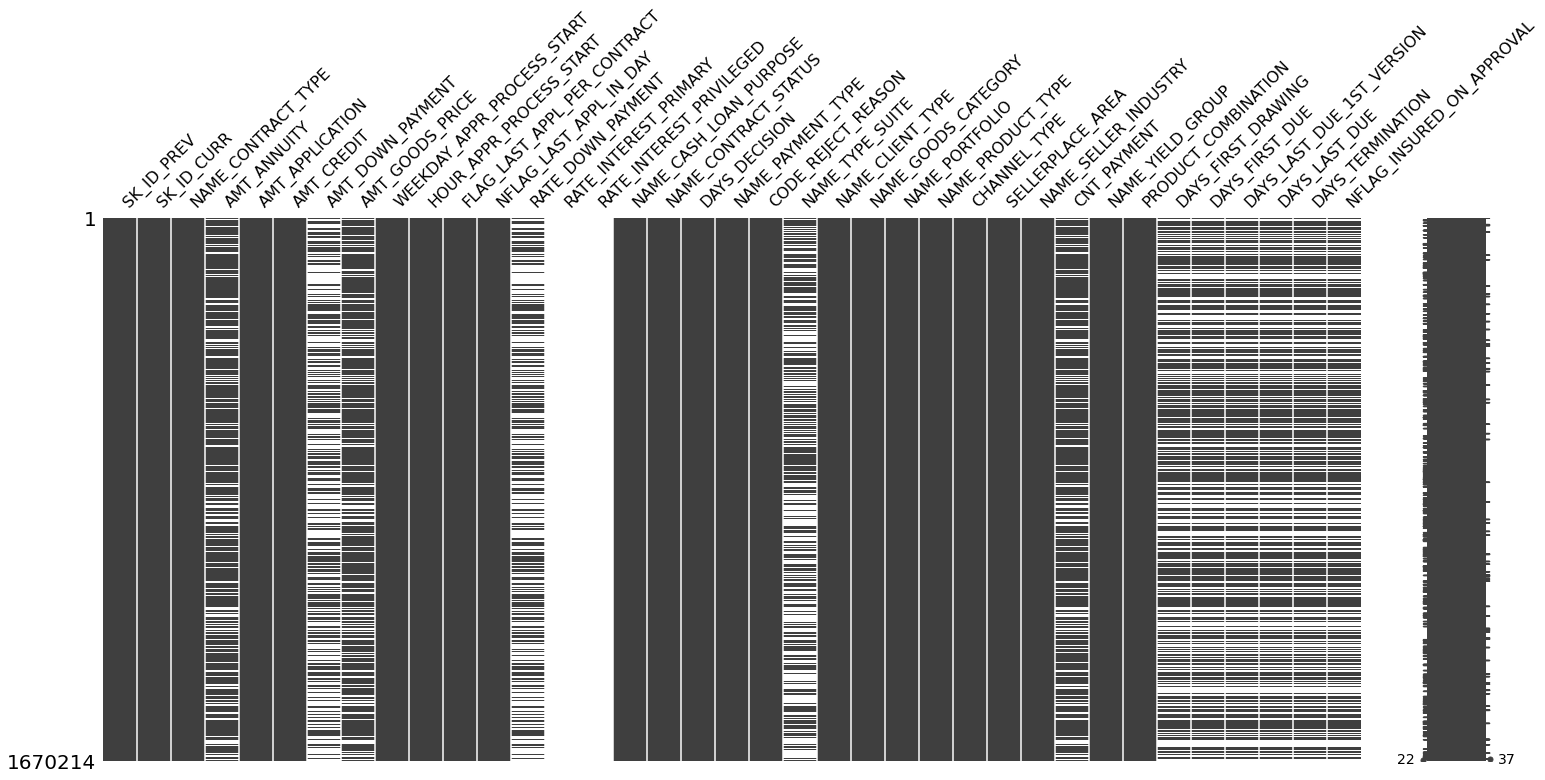

In [22]:
fct.pourcent_NA_df(previous_application)
msno.matrix(previous_application)
# Missing values statistics
missing_values = missing_values_table(previous_application)
missing_values.head(20)



   Installment_payment

Il y a 99.99% valeurs renseignées (soit 0.01 % de valeurs manquantes) dans l'intégralité du df
Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
DAYS_ENTRY_PAYMENT,2905,0.0
AMT_PAYMENT,2905,0.0


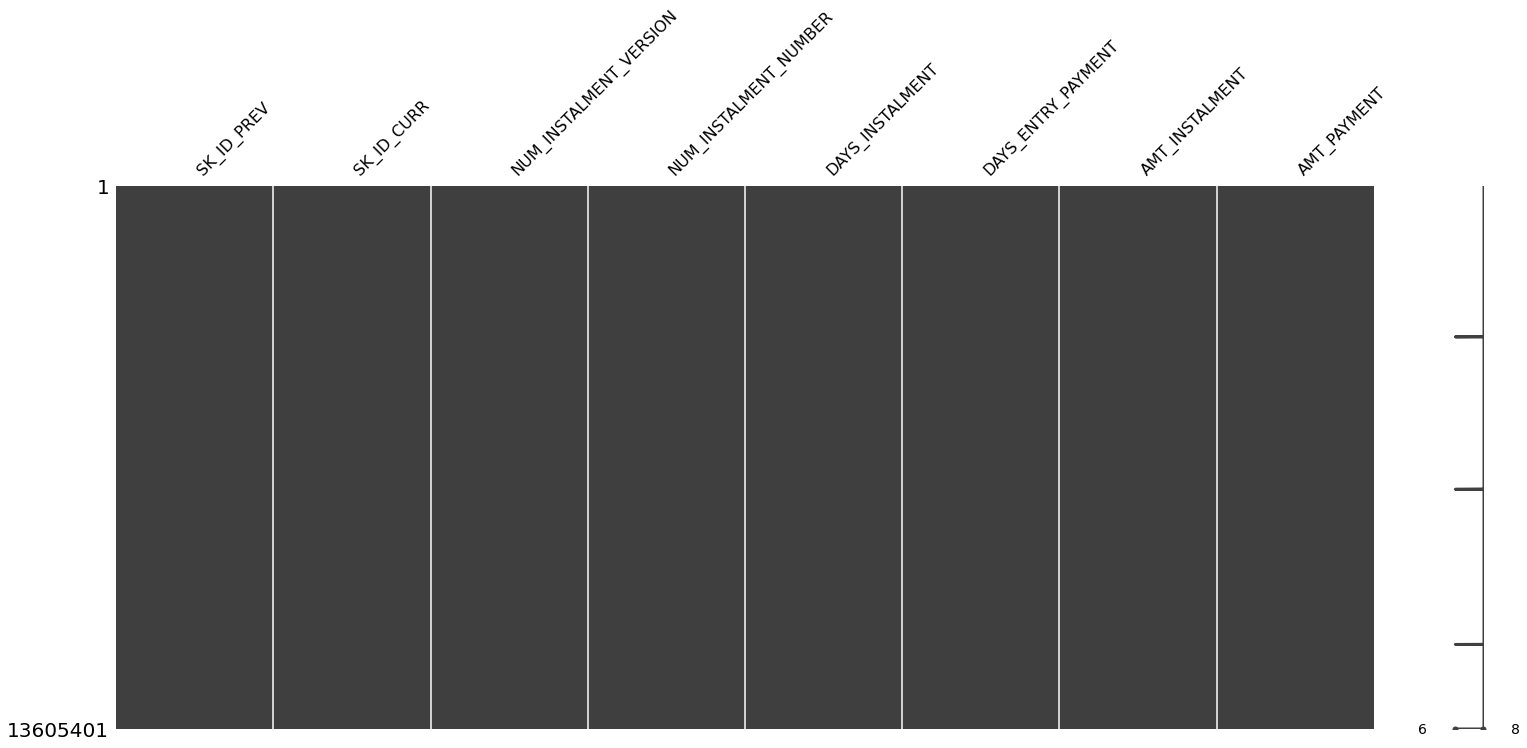

In [23]:
fct.pourcent_NA_df(installments_payments)
msno.matrix(installments_payments)
# Missing values statistics
missing_values = missing_values_table(installments_payments)
missing_values.head(20)



   Credit_balance

Il y a 93.35% valeurs renseignées (soit 6.65 % de valeurs manquantes) dans l'intégralité du df
Your selected dataframe has 23 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5
CNT_DRAWINGS_POS_CURRENT,749816,19.5
AMT_INST_MIN_REGULARITY,305236,7.9
CNT_INSTALMENT_MATURE_CUM,305236,7.9


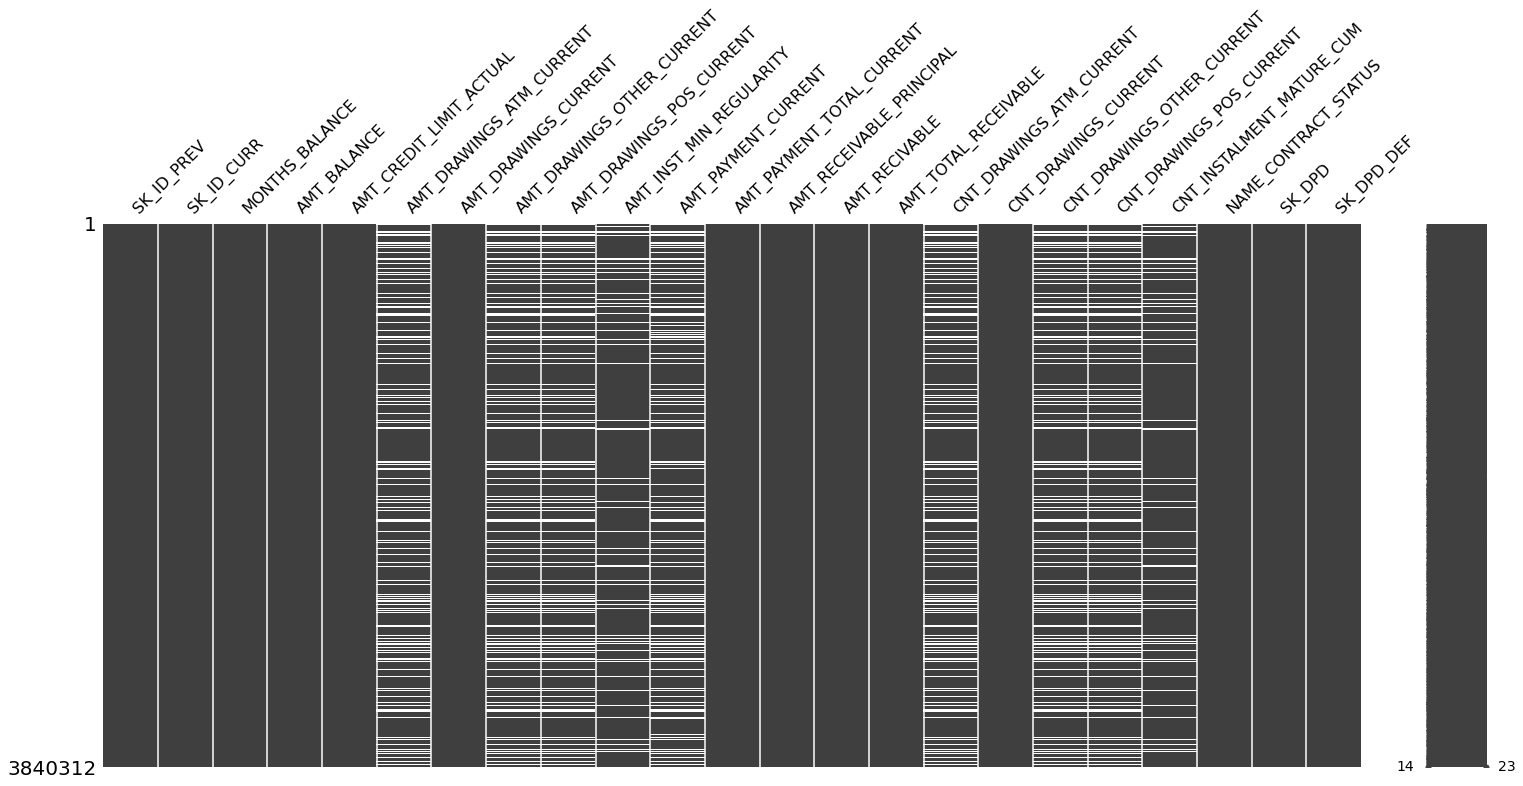

In [24]:
fct.pourcent_NA_df(credit_card_balance)
msno.matrix(credit_card_balance)
# Missing values statistics
missing_values = missing_values_table(credit_card_balance)
missing_values.head(20)



   bureau

Il y a 86.50% valeurs renseignées (soit 13.50 % de valeurs manquantes) dans l'intégralité du df
Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


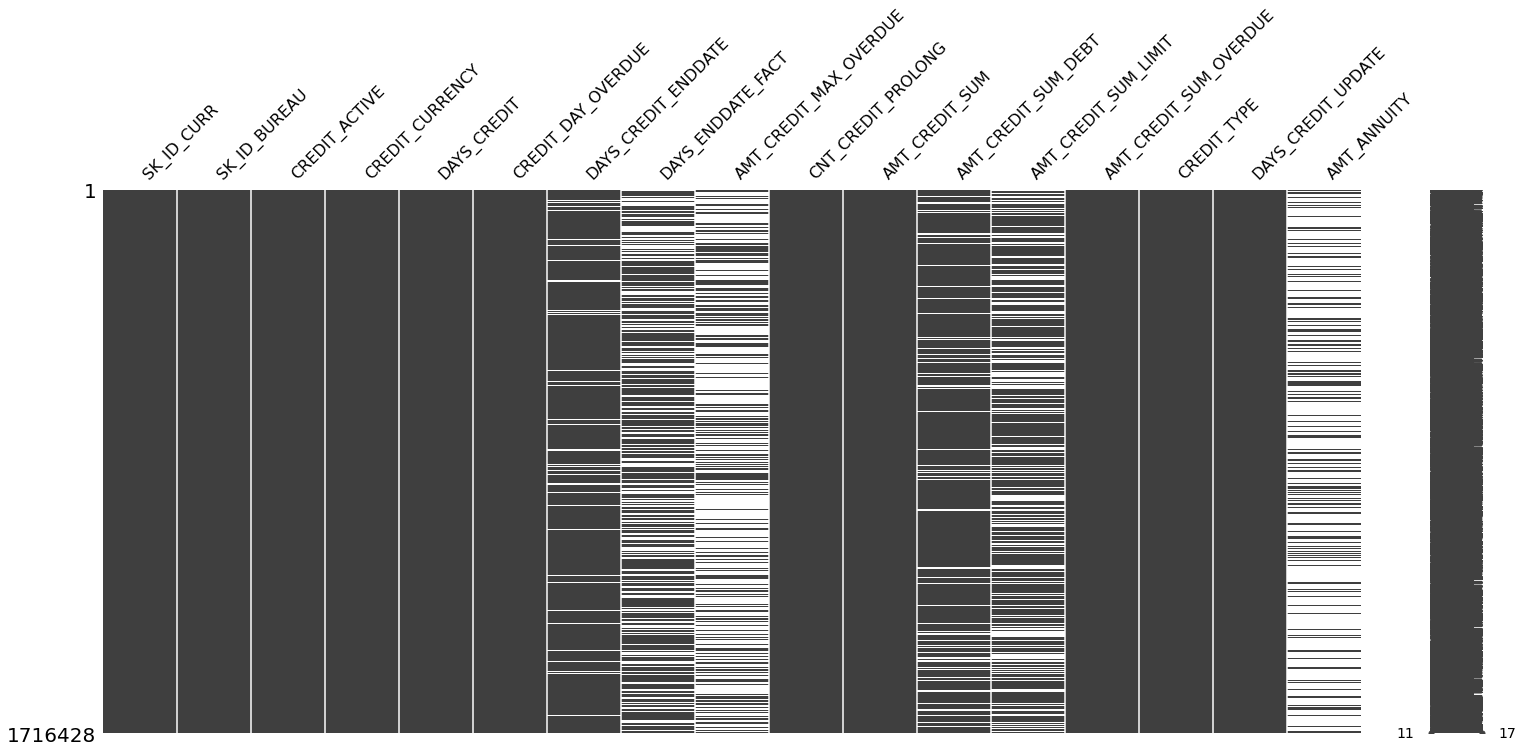

In [25]:
fct.pourcent_NA_df(bureau)
msno.matrix(bureau)
# Missing values statistics
missing_values = missing_values_table(bureau)
missing_values.head(20)



   Pour le moment on ne peut pas savoir si ces colonnes sont importantes pour la suite de l'étude. Je les garde donc pour le moment.

   # Type de colonnes

In [26]:
# Number of each type of column
application_train.dtypes.value_counts()



float64    65
int64      41
object     16
dtype: int64

In [27]:
# nombre d'entrées différentes pour les colonnes 'object'
application_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)



NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

   La plupart des colonnes catégorielles ne présentent pas beaucoup de valeurs différentes (cardinalité faible, sauf pour les colonnes occupation_type et organisation_type).

   Les colonnes présentant 2 valeurs pourront être transformées avec un label_encoder (4 colonnes), les autres pourront être transformées via un one hot encoder.

   # Data exploration
   ## données catégorielles

In [28]:
col_obj = list(application_train.select_dtypes('object').columns)
for col in col_obj:
    print('-'*10)
    print(col)
    print(application_train[col].value_counts(dropna=False))



----------
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
----------
CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
----------
FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
----------
FLAG_OWN_REALTY
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
----------
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
----------
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
----------
NAME_EDUCATION_TYPE

  code gender : 4 code XNA qui doivent correspondrent à NaN

  ORGANIZATION_TYPE : 55353 code XNA

  ## variables DAYS
   ### days_birth

In [29]:
(application_train['DAYS_BIRTH'] / -365).describe()



count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

   Pas d'anomalie sur l'age des personnes ayant candidaté pour un pret
   ### Days_employed

In [30]:
(application_train.DAYS_EMPLOYED / -365).describe()



count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

   Probleme avec la valeur min qui représente 1000 ans...

Text(0.5, 0, 'Days Employment')

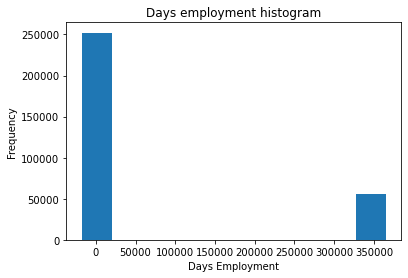

In [31]:
application_train.DAYS_EMPLOYED.plot.hist(title='Days employment histogram')
plt.xlabel('Days Employment')



In [32]:
application_train.DAYS_EMPLOYED.value_counts()



 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Count'>

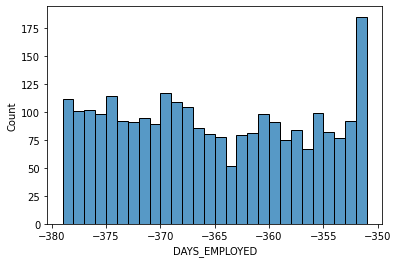

In [33]:
temp = application_train[(application_train.DAYS_EMPLOYED < -350)
                         & (application_train.DAYS_EMPLOYED > -380)]

sns.histplot(data=temp, x='DAYS_EMPLOYED', bins=28)



   Cette anomalie est présente pour 55374 clients et prend systématiquement la même valeur 365243 (qui ressemble au nombre de jours dans une année, en oubliant la virgule : 365.243). Regardons plus en détail la répartition de cette anomalie en fonction de la target

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Count'>

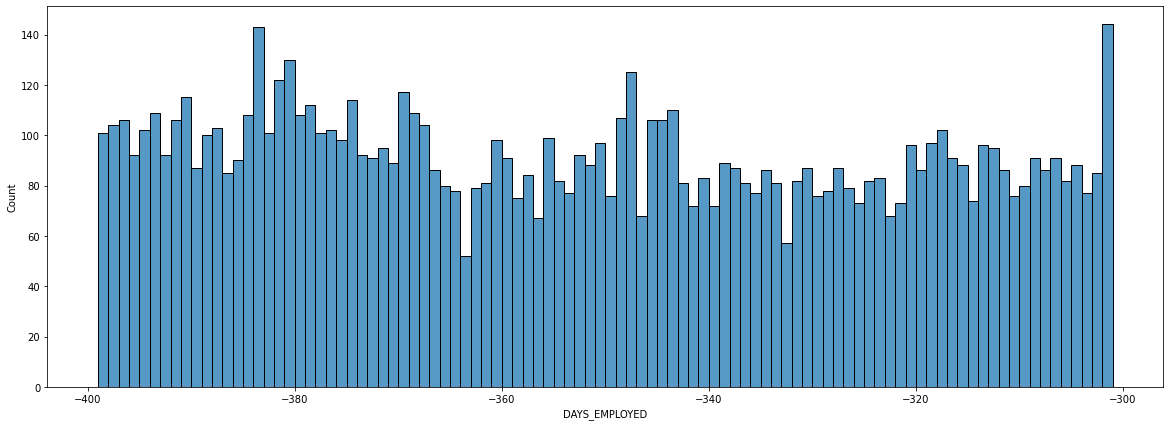

In [34]:
temp = application_train[(application_train.DAYS_EMPLOYED < -300)
                         & (application_train.DAYS_EMPLOYED > -400)]
plt.figure(figsize=(20, 7))
sns.histplot(data=temp, x='DAYS_EMPLOYED', bins=98)



In [35]:
masque = (application_train.DAYS_EMPLOYED == 365243)
anomalie = application_train[masque]
non_anomalie = application_train[~masque]
refus_anomalies = 100 * anomalie.TARGET.mean()
refus_non_anomalies = 100 * non_anomalie.TARGET.mean()
print('{:.2f} % des clients ayant un pb sur la durée de'.format(refus_anomalies),
      'travail présentent un refus de prêt')
print('{:.2f} % des clients ayant une durée de'.format(refus_non_anomalies),
      'travail normale présentent un refus de prêt')



5.40 % des clients ayant un pb sur la durée de travail présentent un refus de prêt
8.66 % des clients ayant une durée de travail normale présentent un refus de prêt


   Les clients présentant une anomalie sur leur durée d'emplois présentent moins de refus de prêt.

   Comme la valeur de cette anomalie est constante (days_employed = 365243), je vais garder l'information de cete anomalie au cas où elle corresponde à une autre information.

Text(0.5, 0, 'Days Employment')

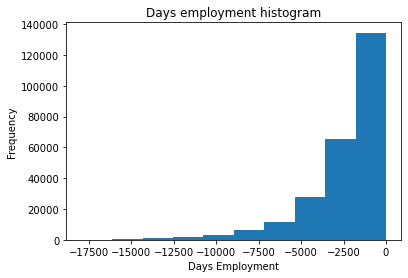

In [36]:
# creation d'une colonne pour stocker l'info anomalie / non  anomalie
application_train['DAYS_EMPLOYED_ANOM'] = masque

# remplacement des valeurs anormales par np.NaN
application_train.DAYS_EMPLOYED.replace({365243: np.nan}, inplace=True)

application_train.DAYS_EMPLOYED.plot.hist(title='Days employment histogram')
plt.xlabel('Days Employment')



   La distribution est plus cohérente avec ce qui est attendu.

   ### Days_id_publish

In [37]:
(application_train.DAYS_ID_PUBLISH / -365).describe()



count    307511.000000
mean          8.203294
std           4.135481
min          -0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

Text(0.5, 0, 'Days ID published')

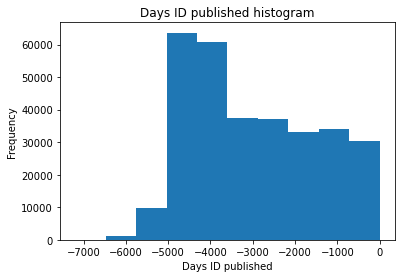

In [38]:
application_train.DAYS_ID_PUBLISH.plot.hist(
    title='Days ID published histogram')
plt.xlabel('Days ID published')



   pas de soucis

   ### Days_last_phone_change

In [39]:
(application_train.DAYS_LAST_PHONE_CHANGE / -365).describe()



count    307510.000000
mean          2.637969
std           2.265229
min          -0.000000
25%           0.750685
50%           2.073973
75%           4.301370
max          11.758904
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

Text(0.5, 0, 'Days last phone change')

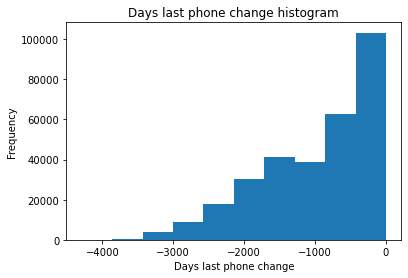

In [40]:
application_train.DAYS_LAST_PHONE_CHANGE.plot.hist(
    title='Days last phone change histogram')
plt.xlabel('Days last phone change')



   Pas de soucis

   ### Days_registration

In [41]:
(application_train.DAYS_REGISTRATION / -365).describe()



count    307511.000000
mean         13.660604
std           9.651743
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

Text(0.5, 0, 'Days registration')

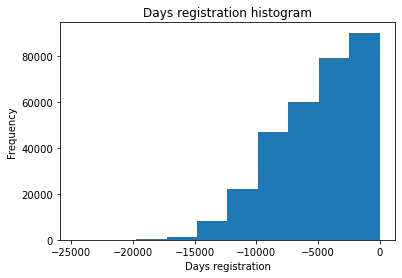

In [42]:
application_train.DAYS_REGISTRATION.plot.hist(
    title='Days registration histogram')
plt.xlabel('Days registration')



   Quelques outliers probables au delà de 20000 jours (soit 54 ans)

In [43]:
masque = (application_train.DAYS_REGISTRATION < -20000)
print("Il y a {} lignes présentant une valeur de".format(masque.sum()),
      "days_registration < -20 000")
anomalie = application_train[masque]
non_anomalie = application_train[~masque]
refus_anomalies = 100 * anomalie.TARGET.mean()
refus_non_anomalies = 100 * non_anomalie.TARGET.mean()
print('{:.2f} % des clients ayant un pb sur days_registration'.format(refus_anomalies),
      'présentent un refus de prêt')
print("{:.2f} % des clients n'ayant pas de pb sur days_registration".format(refus_non_anomalies),
      'présentent un refus de prêt')



Il y a 30 lignes présentant une valeur de days_registration < -20 000
3.33 % des clients ayant un pb sur days_registration présentent un refus de prêt
8.07 % des clients n'ayant pas de pb sur days_registration présentent un refus de prêt


In [44]:
application_train[masque]



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
2680,103127,0,Cash loans,F,N,N,0,135000.0,479700.0,49284.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,False
21990,125615,0,Cash loans,F,N,Y,0,39600.0,283585.5,17478.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True
27531,132001,0,Cash loans,M,Y,Y,0,405000.0,1345500.0,51246.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,False
33939,139334,0,Cash loans,F,N,Y,0,117000.0,728460.0,40806.0,...,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0,True
41442,147977,0,Cash loans,F,N,Y,0,135000.0,1125000.0,32895.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
44824,151922,0,Cash loans,M,N,N,0,112500.0,609187.5,25807.5,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,True
45121,152267,0,Cash loans,F,N,N,0,112500.0,630000.0,25114.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,True
68403,179339,0,Cash loans,F,N,Y,0,157500.0,760500.0,33628.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True
75227,187243,0,Cash loans,F,Y,Y,0,315000.0,45000.0,2749.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,True
93123,208132,0,Cash loans,F,N,Y,0,214200.0,1515415.5,41800.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,True


   Les clients présentant une anomalie sur days_registration présentent moins de refus de prêt.

   Je vais garder l'information de cete anomalie au cas où elle corresponde à une autre information.

Text(0.5, 0, 'Days registration')

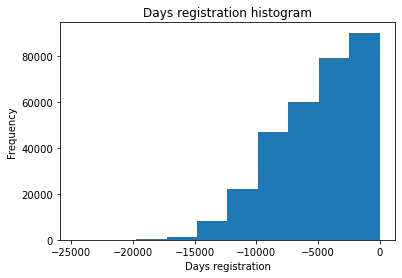

In [45]:
# creation d'une colonne pour stocker l'info anomalie / non  anomalie
application_train['DAYS_REGISTRATION_ANOM'] = masque

# remplacement des valeurs anormales par np.NaN
application_train[masque].DAYS_REGISTRATION = np.nan

application_train.DAYS_REGISTRATION.plot.hist(
    title='Days registration histogram')
plt.xlabel('Days registration')



   ## Distribution des variables quantitatives
   ### AMT_ANNUITY

Text(0.5, 1.0, 'Distribution of AMT_ANNUITY')

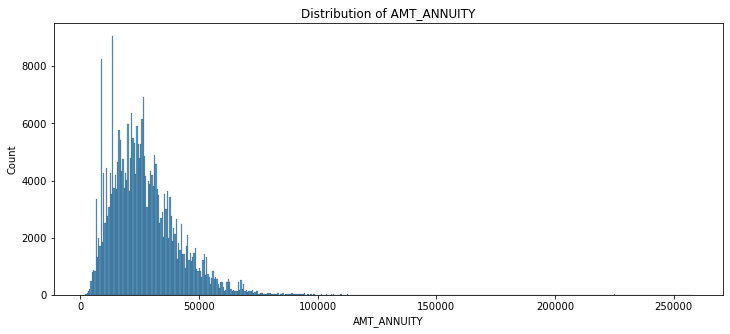

In [46]:
plt.figure(figsize=(12, 5))
ax = sns.histplot(application_train["AMT_ANNUITY"])
plt.title("Distribution of AMT_ANNUITY")

In [83]:
application_train[['AMT_ANNUITY', 'AMT_CREDIT']].corr()

,AMT_ANNUITY,AMT_CREDIT
AMT_ANNUITY,1.000000,0.770138
AMT_CREDIT,0.770138,1.000000


### AMT_CREDIT

Text(0.5, 1.0, 'Distribution of AMT_CREDIT')

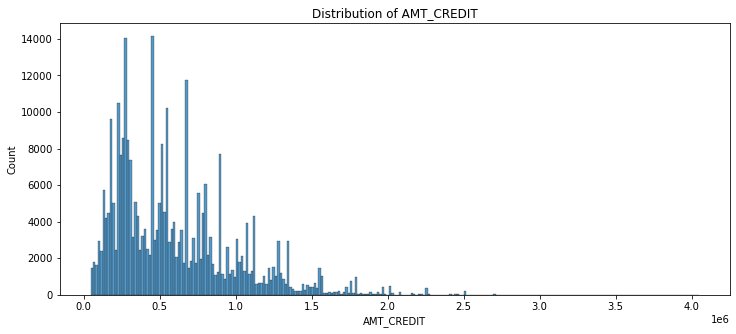

In [47]:
plt.figure(figsize=(12, 5))
ax = sns.histplot(application_train["AMT_CREDIT"])
plt.title("Distribution of AMT_CREDIT")



   ### AMT_INCOME_TOTAL

Text(0.5, 1.0, 'Distribution of AMT_INCOME_TOTAL')

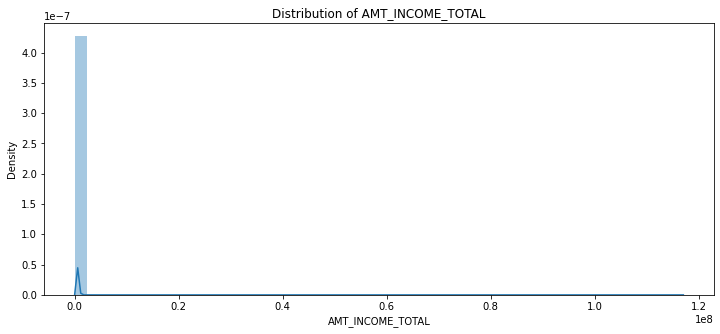

In [48]:
plt.figure(figsize=(12, 5))

ax = sns.distplot(application_train["AMT_INCOME_TOTAL"].dropna())
plt.title("Distribution of AMT_INCOME_TOTAL")



   ### AMT_GOODS_PRICE

Text(0.5, 1.0, 'Distribution of AMT_GOODS_PRICE')

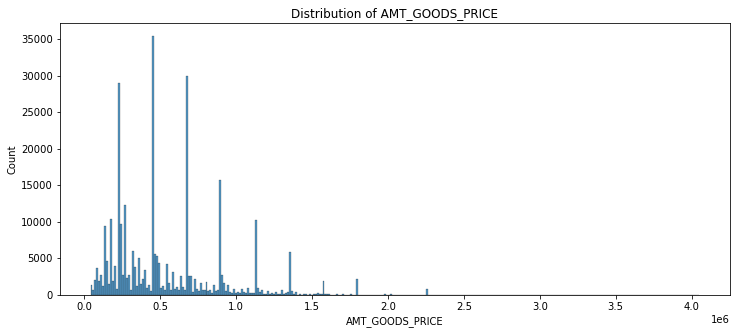

In [49]:
plt.figure(figsize=(12, 5))

ax = sns.histplot(application_train["AMT_GOODS_PRICE"].dropna())
plt.title("Distribution of AMT_GOODS_PRICE")



   ### NAME_TYPE_SUITE : personne qui accompagne le demandeur

In [50]:
temp = application_train["NAME_TYPE_SUITE"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x=temp.index,
    y=(temp / temp.sum())*100,
)
data = [trace]
layout = go.Layout(
    title="Who accompanied client when applying for the  application in % ",
    xaxis=dict(
        title='Name of type of the Suite',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Name of type of the Suite in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='schoolStateNames')



   ### NAME_CONTRACT_TYPE : type de prêt

In [51]:
temp = application_train["NAME_CONTRACT_TYPE"].value_counts()
fig = {
    "data": [
      {
          "values": temp.values,
          "labels": temp.index,
          "domain": {"x": [0, .48]},
          # "name": "Types of Loans",
          # "hoverinfo":"label+percent+name",
          "hole": .7,
          "type": "pie"
      },

    ],
    "layout": {
        "title": "Types of loan",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Loan Types",
                "x": 0.17,
                "y": 0.5
            }

        ]
    }
}
iplot(fig, filename='donut')



   ### Possession de voiture / maison

In [52]:
temp1 = application_train["FLAG_OWN_CAR"].value_counts()
temp2 = application_train["FLAG_OWN_REALTY"].value_counts()

fig = {
    "data": [
      {
          "values": temp1.values,
          "labels": temp1.index,
          "domain": {"x": [0, .48]},
          "name": "Own Car",
          "hoverinfo":"label+percent+name",
          "hole": .6,
          "type": "pie"
      },
        {
          "values": temp2.values,
          "labels": temp2.index,
          # "text":"Own Realty",
          "textposition": "inside",
          "domain": {"x": [.52, 1]},
          "name": "Own Reality",
          "hoverinfo":"label+percent+name",
          "hole": .6,
          "type": "pie"
      }],
    "layout": {
        "title": "What applicant own",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Own Car",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Own Realty",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
iplot(fig, filename='donut')



   ### Source de revenu

In [53]:
temp = application_train["NAME_INCOME_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels', values='values',
         title='Income sources of Applicant\'s', hole=0.5)



   ### Statut familial

In [54]:
temp = application_train["NAME_FAMILY_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels', values='values',
         title='Family Status of Applicant\'s', hole=0.5)



   ### Profession

In [55]:
temp = application_train["OCCUPATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle='Occupation', yTitle="Count",
           title='Occupation of Applicant\'s who applied for loan', color='green')



   ### niveau d'études

In [56]:
temp = application_train["NAME_EDUCATION_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels', values='values',
         title='Education of Applicant\'s', hole=0.5)



   ### Lieu de résidence

In [57]:
temp = application_train["NAME_HOUSING_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels', values='values',
         title='Type of House', hole=0.5)



   ### Secteur d'emplois

In [58]:
temp = application_train["ORGANIZATION_TYPE"].value_counts()
temp.iplot(kind='bar', xTitle='Organization Name', yTitle="Count",
           title='Types of Organizations who applied for loan ', color='red')



   ## Exploration en fonction de la target
   ### Revenus

In [59]:
temp = application_train["NAME_INCOME_TYPE"].value_counts()
# print(temp.values)
temp_y0 = []
temp_y1 = []
ratio = []
i = 0
for val in temp.index:
    temp_y1.append(np.sum(
        application_train["TARGET"][application_train["NAME_INCOME_TYPE"] == val] == 1))
    temp_y0.append(np.sum(
        application_train["TARGET"][application_train["NAME_INCOME_TYPE"] == val] == 0))
    ratio.append(100 * (temp_y1[i] / (temp_y1[i] + temp_y0[i])))
    i += 1
# print(temp_y1)
# print(temp_y0)
print(ratio)
trace1 = go.Bar(
    x=temp.index,
    y=ratio,
    # name='YES'
)


data = [trace1]
layout = go.Layout(
    title="Pourcentage de prêts refusés en fonction de la source de revenu",
    # barmode='stack',
    width=1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Prêts refusés (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



[9.588471664126368, 7.484256531270509, 5.386366099490625, 5.754964751416855, 36.36363636363637, 0.0, 0.0, 40.0]


   ### Statut familial

In [60]:
temp = application_train["NAME_FAMILY_STATUS"].value_counts()
# print(temp.values)
temp_y0 = []
temp_y1 = []
ratio = []
i = 0
for val in temp.index:
    temp_y1.append(np.sum(
        application_train["TARGET"][application_train["NAME_FAMILY_STATUS"] == val] == 1))
    temp_y0.append(np.sum(
        application_train["TARGET"][application_train["NAME_FAMILY_STATUS"] == val] == 0))
    ratio.append(100 * (temp_y1[i] / (temp_y1[i] + temp_y0[i])))
    i += 1
# print(temp_y1)
# print(temp_y0)
# print(ratio)
trace1 = go.Bar(
    x=temp.index,
    y=ratio,
    # name='YES'
)


data = [trace1]
layout = go.Layout(
    title="Pourcentage de prêts refusés en fonction du statut familial",
    # barmode='stack',
    width=1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Prêts refusés (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



   ### Profession

In [61]:
temp = application_train["OCCUPATION_TYPE"].value_counts()
# print(temp.values)
temp_y0 = []
temp_y1 = []
ratio = []
i = 0
for val in temp.index:
    temp_y1.append(np.sum(
        application_train["TARGET"][application_train["OCCUPATION_TYPE"] == val] == 1))
    temp_y0.append(np.sum(
        application_train["TARGET"][application_train["OCCUPATION_TYPE"] == val] == 0))
    ratio.append(100 * (temp_y1[i] / (temp_y1[i] + temp_y0[i])))
    i += 1
# print(temp_y1)
# print(temp_y0)
# print(ratio)
trace1 = go.Bar(
    x=temp.index,
    y=ratio,
    # name='YES'
)


data = [trace1]
layout = go.Layout(
    title="Pourcentage de prêts refusés en fonction de la profession",
    # barmode='stack',
    width=1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Prêts refusés (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



   ### Niveau d'étude

In [62]:
temp = application_train["NAME_EDUCATION_TYPE"].value_counts()
# print(temp.values)
temp_y0 = []
temp_y1 = []
ratio = []
i = 0
for val in temp.index:
    temp_y1.append(np.sum(
        application_train["TARGET"][application_train["NAME_EDUCATION_TYPE"] == val] == 1))
    temp_y0.append(np.sum(
        application_train["TARGET"][application_train["NAME_EDUCATION_TYPE"] == val] == 0))
    ratio.append(100 * (temp_y1[i] / (temp_y1[i] + temp_y0[i])))
    i += 1
# print(temp_y1)
# print(temp_y0)
# print(ratio)
trace1 = go.Bar(
    x=temp.index,
    y=ratio,
    # name='YES'
)


data = [trace1]
layout = go.Layout(
    title="Pourcentage de prêts refusés en fonction de la profession",
    # barmode='stack',
    width=1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Prêts refusés (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



   ### lieu de résidence

In [63]:
temp = application_train["NAME_HOUSING_TYPE"].value_counts()
# print(temp.values)
temp_y0 = []
temp_y1 = []
ratio = []
i = 0
for val in temp.index:
    temp_y1.append(np.sum(
        application_train["TARGET"][application_train["NAME_HOUSING_TYPE"] == val] == 1))
    temp_y0.append(np.sum(
        application_train["TARGET"][application_train["NAME_HOUSING_TYPE"] == val] == 0))
    ratio.append(100 * (temp_y1[i] / (temp_y1[i] + temp_y0[i])))
    i += 1
# print(temp_y1)
# print(temp_y0)
# print(ratio)
trace1 = go.Bar(
    x=temp.index,
    y=ratio,
    # name='YES'
)


data = [trace1]
layout = go.Layout(
    title="Pourcentage de prêts refusés en fonction du lieu d'habitation",
    # barmode='stack',
    width=1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Prêts refusés (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



   ### Secteur d'emplois

In [64]:
temp = application_train["ORGANIZATION_TYPE"].value_counts()
# print(temp.values)
temp_y0 = []
temp_y1 = []
ratio = []
i = 0
for val in temp.index:
    temp_y1.append(np.sum(
        application_train["TARGET"][application_train["ORGANIZATION_TYPE"] == val] == 1))
    temp_y0.append(np.sum(
        application_train["TARGET"][application_train["ORGANIZATION_TYPE"] == val] == 0))
    ratio.append(100 * (temp_y1[i] / (temp_y1[i] + temp_y0[i])))
    i += 1
# print(temp_y1)
# print(temp_y0)
# print(ratio)
trace1 = go.Bar(
    x=temp.index,
    y=ratio,
    # name='YES'
)


data = [trace1]
layout = go.Layout(
    title="Pourcentage de prêts refusés en fonction du secteur d'emplois",
    # barmode='stack',
    width=1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Prêts refusés (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



   ### Accompagnant du demandeur de prêt

In [65]:
temp = application_train["NAME_TYPE_SUITE"].value_counts()
# print(temp.values)
temp_y0 = []
temp_y1 = []
ratio = []
i = 0
for val in temp.index:
    temp_y1.append(np.sum(
        application_train["TARGET"][application_train["NAME_TYPE_SUITE"] == val] == 1))
    temp_y0.append(np.sum(
        application_train["TARGET"][application_train["NAME_TYPE_SUITE"] == val] == 0))
    ratio.append(100 * (temp_y1[i] / (temp_y1[i] + temp_y0[i])))
    i += 1
# print(temp_y1)
# print(temp_y0)
# print(ratio)
trace1 = go.Bar(
    x=temp.index,
    y=ratio,
    # name='YES'
)


data = [trace1]
layout = go.Layout(
    title="Pourcentage de prêts refusés en fonction de l'accompagnant du demandeur",
    # barmode='stack',
    width=1000,
    xaxis=dict(
        title='Income source',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Prêts refusés (%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)



   # Previous application : data exploration

In [66]:
nb_pret = len(previous_application.SK_ID_CURR.unique())
nb_pret_tot = len(application_train.SK_ID_CURR.unique()) + \
    len(application_test.SK_ID_CURR.unique())
print("{} pret en cours on été fait par des personnes ayant".format(nb_pret),
      "déjà fait une demande de prêt par le passé",
      " Soit {:.2f} % des prêts en cours".format(100*nb_pret/nb_pret_tot))



338857 pret en cours on été fait par des personnes ayant déjà fait une demande de prêt par le passé  Soit 95.12 % des prêts en cours


   ## Type de contrats précédemment contractés

In [67]:
temp = previous_application["NAME_CONTRACT_TYPE"].value_counts()
fig = {
    "data": [
      {
          "values": temp.values,
          "labels": temp.index,
          "domain": {"x": [0, .48]},
          # "name": "Types of Loans",
          # "hoverinfo":"label+percent+name",
          "hole": .7,
          "type": "pie"
      },

    ],
    "layout": {
        "title": "Contract product type of previous application",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Contract product type",
                "x": 0.12,
                "y": 0.5
            }

        ]
    }
}
iplot(fig, filename='donut')



   ## Utilisation du prêt

In [68]:
temp = previous_application["NAME_CASH_LOAN_PURPOSE"].value_counts()
#print("Total number of states : ",len(temp))
trace = go.Bar(
    x=temp.index,
    y=(temp / temp.sum())*100,
    marker=dict(
        color=(temp / temp.sum())*100,
        colorscale='Blues',
        reversescale=True
    ),
)
data = [trace]
layout = go.Layout(
    title="Purpose of cash loan in previous application in % ",
    xaxis=dict(
        title='Purpose of cash loan',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)



   Information globalement peu communiquée (hyp : XAP et XNA correspondent à NaN)

   ## Statut des demandes précédentes

In [69]:
temp = previous_application["NAME_CONTRACT_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels', values='values',
         title='Contract approved or not', hole=0.5)



   ## Type de remboursement choisi par le demandeur

In [70]:
temp = previous_application["NAME_PAYMENT_TYPE"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels', values='values',
         title='Payment method that client choose to pay for the previous application', hole=0.7, colors=['#75e575', '#ea7c96', ])



   ## Raisons du refus

In [71]:
temp = previous_application["CODE_REJECT_REASON"].value_counts()
temp.iplot(kind='bar', xTitle='Reason', yTitle="Count",
           title='Top reasons of previous application rejection(Wriiten in some codes)', colors=['#75e575'])



   ## demande d'assurance pour un prêt précédent

In [72]:
temp = previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                   })
df.iplot(kind='pie', labels='labels', values='values',
         title='Did the client requested insurance during the previous application(YES : 1, NO : 0)', hole=0.7, colors=['#ea7c96', '#75e575', ])



   # Correlation de pearson

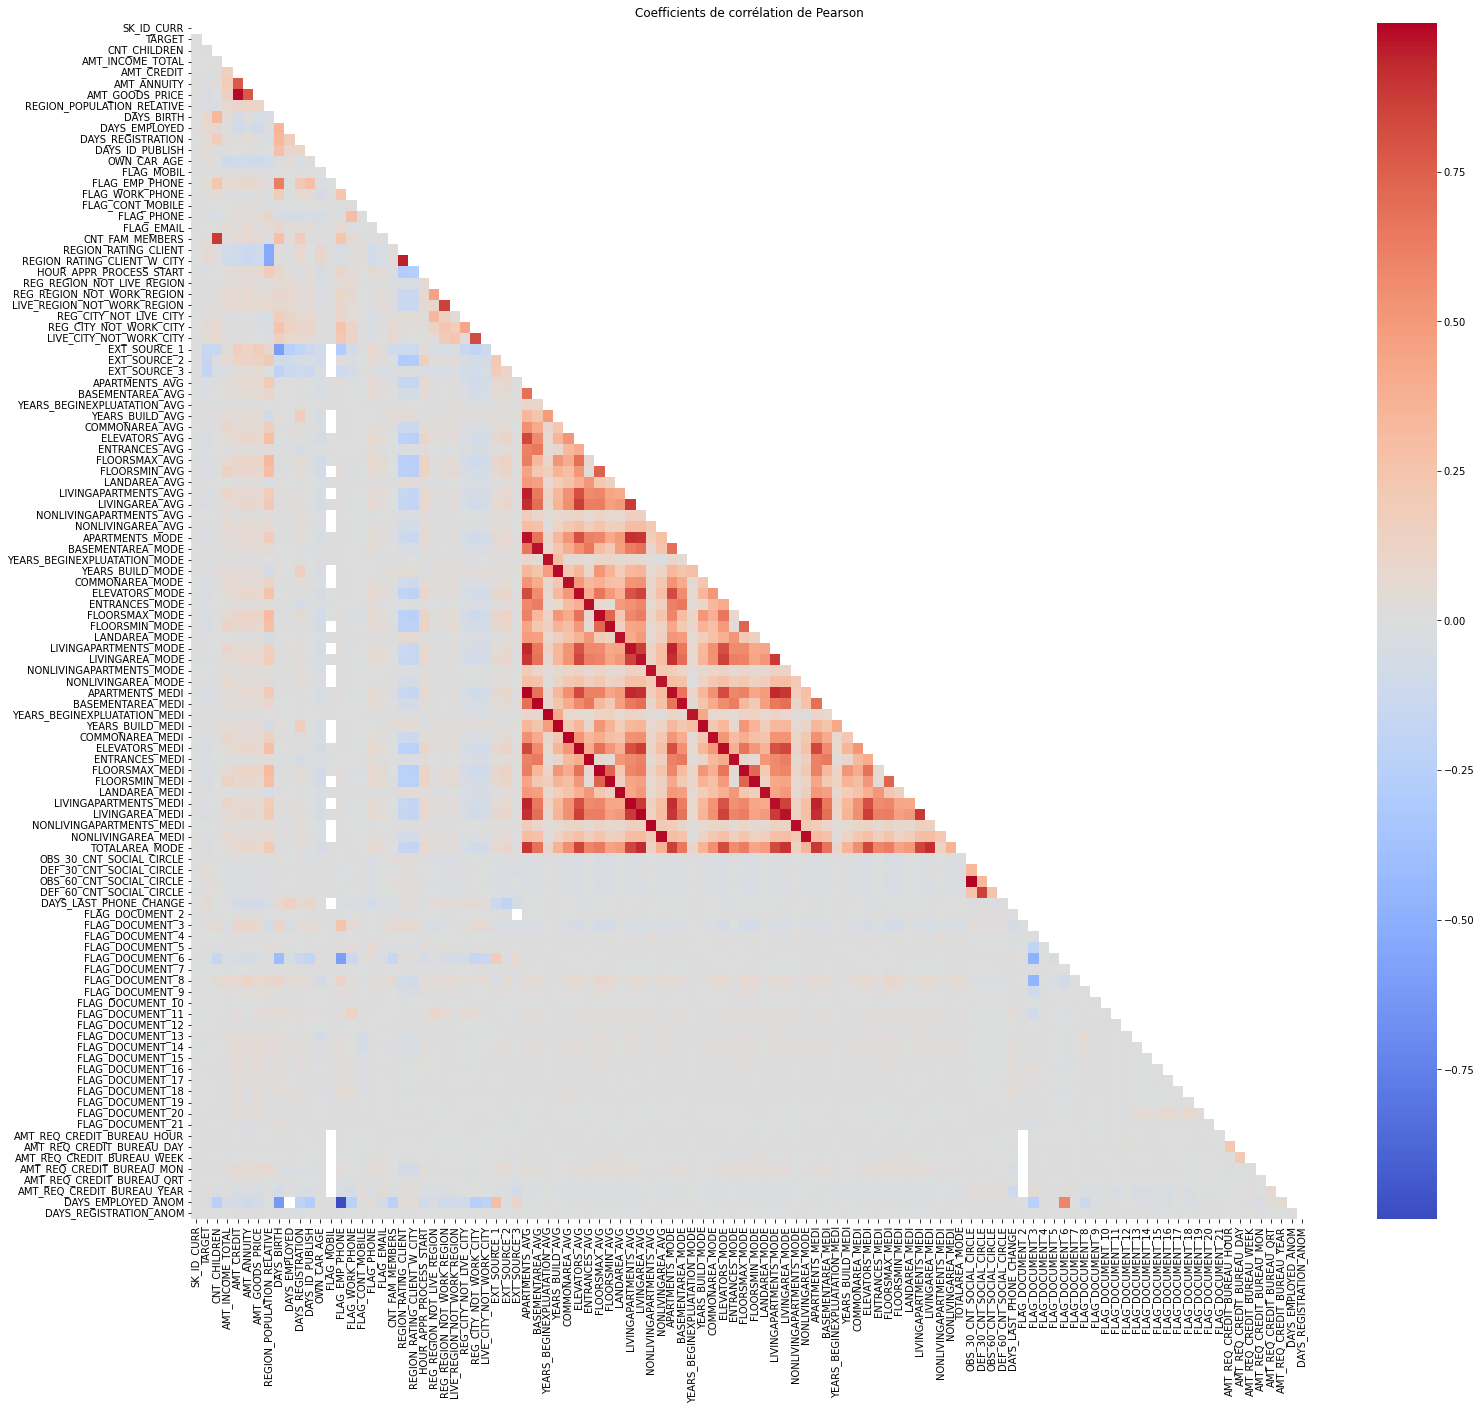

In [73]:
# calcul de la matrice de corrélation et visualisation sous forme de heatmap
corr = application_train.corr()
# pour masquer la partie supérieure droite de la matrice de corrélation
mask = np.triu(np.ones_like(corr, dtype=bool))

# graph
fig = plt.figure(figsize=(25, 22))
sns.heatmap(data=corr, mask=mask, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson")
plt.show()



   Des variables semblent corrélées entre elles (variables qui correspondent à des valeurs midi, mini, mode, avg de mêmes variables)

In [74]:
# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))



Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


   Les correlations positive avec la target sont très faibles (max = 0.08). Par contre les corrélation négatives présentent des valeurs un peu plus élevées (-0.18)
   ## Days_BIRTH vs TARGET

In [75]:
# Age information into a separate dataframe
age_data = application_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(
    age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))
age_data.head(10)



,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"
5,0,-16941,46.413699,"(45.0, 50.0]"
6,0,-13778,37.747945,"(35.0, 40.0]"
7,0,-18850,51.643836,"(50.0, 55.0]"
8,0,-20099,55.065753,"(55.0, 60.0]"
9,0,-14469,39.641096,"(35.0, 40.0]"


In [76]:
# Group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups



,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,-8532.795625,23.377522
"(25.0, 30.0]",0.111436,-10155.219250,27.822518
"(30.0, 35.0]",0.102814,-11854.848377,32.479037
"(35.0, 40.0]",0.089414,-13707.908253,37.555913
"(40.0, 45.0]",0.078491,-15497.661233,42.459346
"(45.0, 50.0]",0.074171,-17323.900441,47.462741
"(50.0, 55.0]",0.066968,-19196.494791,52.593136
"(55.0, 60.0]",0.055314,-20984.262742,57.491131
"(60.0, 65.0]",0.052737,-22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

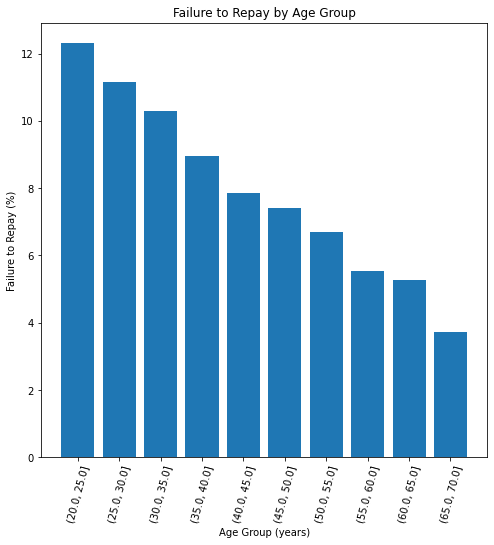

In [77]:
plt.figure(figsize=(8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation=75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')



   plus un demandeur est jeune plus il risque de ne pas réussir à rembourser son prêt
   ## EXT_SOURCE vs TARGET

In [78]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_train[['TARGET', 'EXT_SOURCE_1',
                              'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs



,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

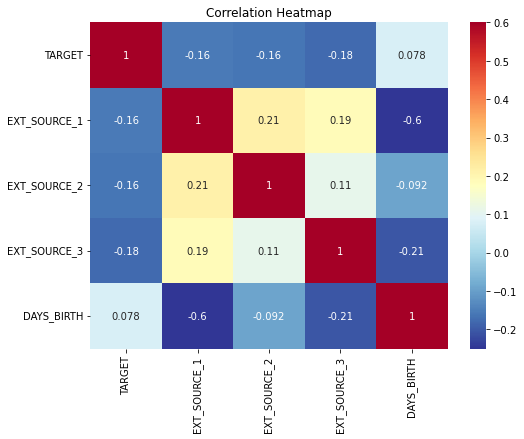

In [79]:
plt.figure(figsize=(8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r,
            vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap')



   Plus la valeur de ext_source augmente, plus le client est susceptible de rembourser le prêt

# Export des fichiers

In [80]:
application_train.to_csv('../01_DATA/EDA_application_train.csv')
POS_CASH_balance.to_csv('../01_DATA/EDA_POS_CASH_balance.csv')
bureau_balance.to_csv('../01_DATA/EDA_bureau_balance.csv')
previous_application.to_csv('../01_DATA/EDA_previous_application.csv')
installments_payments.to_csv('../01_DATA/EDA_installments_payments.csv')
credit_card_balance.to_csv('../01_DATA/EDA_credit_card_balance.csv')
bureau.to_csv('../01_DATA/EDA_bureau.csv')
